<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/CDMX/Regresi%C3%B3n_Lineal/Coeficientes/Tablas_Coeficientes_cdmx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer la base de la cdmx limpia
df= pd.read_csv("Mexico_Outliers_y_Categorización.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-28,city scrape,Marco,within an hour,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""40 inch HDTV with Amazon Prime Video, Netfli...",...,(83 - 91%) Alto,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-27,city scrape,Dici,a few days or more,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",...,(83 - 91%) Alto,(3) Verificación completa,2,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-28,city scrape,Fernando,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(2) Pocas camas,(0) Sin reseñas,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-28,city scrape,Martina,within an hour,"['email', 'phone']",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,2,(2) Pocas camas,(1) Reseña mensual mínima,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-28,city scrape,Nicholas,within a day,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",...,(56 - 64%) Aceptable,(2) Verificación moderada,1,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-28,city scrape,Alex,within an hour,"['email', 'phone', 'work_email']",Cuauhtémoc,Tiny home,Entire home/apt,1 bath,"[""Wifi"", ""Mini fridge"", ""Host greets you"", ""Pa...",...,(92 - 100%) Excelente,(3) Verificación completa,1,(0 - 1) Una cama,(2 - 5) Reseñas mensuales moderadas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [3]:
# Observamos los valores numéricos de la columna catégorica "room_type"
df[["room_type","room_type_num"]].value_counts()

,,count
room_type,room_type_num,
Entire home/apt,0,17432
Private room,2,8581
Shared room,3,401
Hotel room,1,122


In [4]:
# Separamos los datos cuantitativos
df = df.select_dtypes(np.number)
df

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
0,4796027,2013,100.0,88.0,1.0,3,1,1,19.420630,-99.165860,...,56.0,0.41,1652.0,2.0,56.0,0,4,3,3,1
1,153786,2010,0.0,89.8,0.0,1,1,1,19.382830,-99.271780,...,0.0,1.13,3663.0,1.0,12.0,0,3,0,3,2
2,196253,2010,100.0,92.0,1.0,17,1,1,19.411620,-99.177940,...,64.0,0.42,1275.0,2.0,26.0,0,4,3,3,1
3,4647293,2013,100.0,96.0,1.0,1,1,1,19.439560,-99.172630,...,161.0,1.19,814.0,3.0,36.0,0,9,3,3,2
4,334451,2011,89.0,62.0,1.0,3,1,1,19.411520,-99.168570,...,49.0,0.32,1923.0,2.0,21.0,0,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13,1,1,19.404546,-99.168252,...,0.0,1.13,7850.0,2.0,31.0,0,4,3,3,1
26532,7681206,2013,97.0,91.0,0.0,33,1,1,19.420567,-99.166263,...,0.0,1.13,1478.0,2.0,48.0,0,4,3,3,1
26533,50951150,2015,100.0,100.0,2.0,12,1,1,19.408648,-99.170992,...,0.0,1.13,936.0,1.0,39.0,0,4,3,3,1
26534,147254250,2017,100.0,100.0,1.0,3,1,1,19.412367,-99.166447,...,0.0,1.13,768.0,2.0,10.0,0,4,3,3,1


# Tabla de coeficientes de determinación y correlación

## Entire Home / apt

In [5]:
dfHome = df[df["room_type_num"] == 0]
dfHome

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
0,4796027,2013,100.0,88.0,1.0,3,1,1,19.420630,-99.165860,...,56.0,0.41,1652.0,2.0,56.0,0,4,3,3,1
1,153786,2010,0.0,89.8,0.0,1,1,1,19.382830,-99.271780,...,0.0,1.13,3663.0,1.0,12.0,0,3,0,3,2
2,196253,2010,100.0,92.0,1.0,17,1,1,19.411620,-99.177940,...,64.0,0.42,1275.0,2.0,26.0,0,4,3,3,1
3,4647293,2013,100.0,96.0,1.0,1,1,1,19.439560,-99.172630,...,161.0,1.19,814.0,3.0,36.0,0,9,3,3,2
4,334451,2011,89.0,62.0,1.0,3,1,1,19.411520,-99.168570,...,49.0,0.32,1923.0,2.0,21.0,0,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,19255745,2014,100.0,100.0,1.0,13,1,1,19.404546,-99.168252,...,0.0,1.13,7850.0,2.0,31.0,0,4,3,3,1
26532,7681206,2013,97.0,91.0,0.0,33,1,1,19.420567,-99.166263,...,0.0,1.13,1478.0,2.0,48.0,0,4,3,3,1
26533,50951150,2015,100.0,100.0,2.0,12,1,1,19.408648,-99.170992,...,0.0,1.13,936.0,1.0,39.0,0,4,3,3,1
26534,147254250,2017,100.0,100.0,1.0,3,1,1,19.412367,-99.166447,...,0.0,1.13,768.0,2.0,10.0,0,4,3,3,1


In [6]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfHome = dfHome.drop("room_type_num", axis = 1)
corrTabla1 = abs(dfHome.corr())
corrTabla1

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
host_id,1.000000,0.973417,0.001036,0.065814,0.028408,0.030476,0.177397,0.016577,0.023020,0.061753,...,0.088759,0.191832,0.052511,0.027183,0.038045,0.070276,0.036216,0.046809,0.000561,0.021909
host_since,0.973417,1.000000,0.006544,0.065112,0.032189,0.022184,0.168583,0.013368,0.010926,0.059722,...,0.087511,0.176879,0.060680,0.039609,0.029492,0.072076,0.044893,0.043266,0.000100,0.003055
host_response_rate,0.001036,0.006544,1.000000,0.464848,0.200648,0.053065,0.039712,0.001124,0.073083,0.042749,...,0.013270,0.131919,0.173352,0.007055,0.043205,0.193172,0.017243,0.757427,0.004185,0.075242
host_acceptance_rate,0.065814,0.065112,0.464848,1.000000,0.253445,0.114114,0.029440,0.005866,0.090117,0.018340,...,0.024952,0.184442,0.251357,0.044388,0.053589,0.232691,0.014617,0.488534,0.006439,0.087858
host_is_superhost,0.028408,0.032189,0.200648,0.253445,1.000000,0.018977,0.065107,0.078255,0.079930,0.023427,...,0.055934,0.198769,0.254222,0.072506,0.085220,0.300891,0.034195,0.196545,0.004782,0.087456
host_listings_count,0.030476,0.022184,0.053065,0.114114,0.018977,1.000000,0.042368,0.046980,0.100886,0.052672,...,0.168703,0.030601,0.065180,0.090771,0.024426,0.054174,0.010260,0.104298,0.007642,0.078801
host_has_profile_pic,0.177397,0.168583,0.039712,0.029440,0.065107,0.042368,1.000000,0.038638,0.029895,0.024082,...,0.015452,0.057389,0.012226,0.009265,0.040494,0.091352,0.023147,0.045136,0.003011,0.028457
host_identity_verified,0.016577,0.013368,0.001124,0.005866,0.078255,0.046980,0.038638,1.000000,0.046746,0.016063,...,0.182329,0.050584,0.058535,0.037123,0.047449,0.091751,0.039503,0.026308,0.003869,0.033561
latitude,0.023020,0.010926,0.073083,0.090117,0.079930,0.100886,0.029895,0.046746,1.000000,0.050548,...,0.002451,0.066033,0.128318,0.035277,0.014000,0.089380,0.077598,0.102378,0.012966,0.542880
longitude,0.061753,0.059722,0.042749,0.018340,0.023427,0.052672,0.024082,0.016063,0.050548,1.000000,...,0.026672,0.056422,0.086117,0.135576,0.004971,0.098377,0.134994,0.020275,0.003371,0.351215


<Axes: >

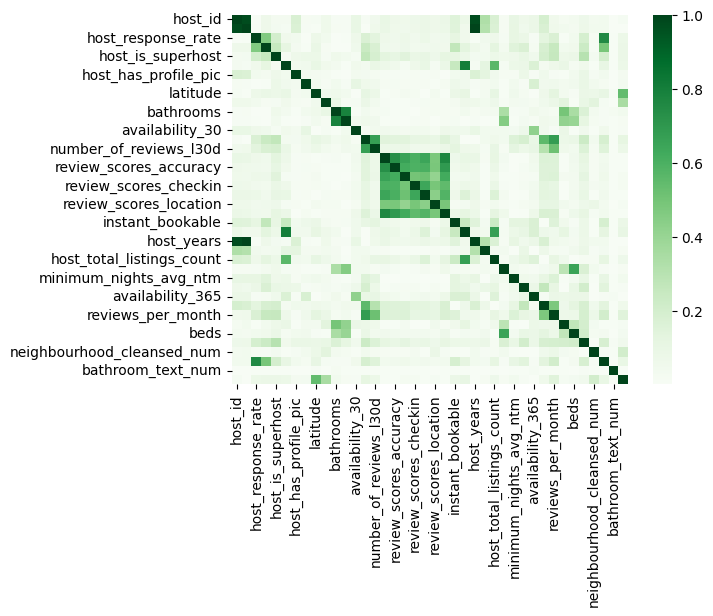

In [7]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(corrTabla1, cmap = 'Greens')
Heat_Map1

# Hotel Room

In [8]:
dfHotel = df[df["room_type_num"] == 1]
dfHotel

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
38,196253,2010,100.0,92.0,1.0,17,1,1,19.411080,-99.176340,...,7.0,0.06,991.0,1.0,27.0,1,4,3,4,1
86,196253,2010,100.0,92.0,1.0,17,1,1,19.413460,-99.177500,...,1.0,0.02,2808.0,1.0,18.0,1,4,3,3,1
90,2518152,2012,100.0,98.0,1.0,8,1,1,19.347350,-99.190160,...,28.0,0.22,991.0,1.0,40.0,1,15,3,4,2
103,2518152,2012,100.0,98.0,1.0,8,1,1,19.347230,-99.193960,...,57.0,0.45,991.0,1.0,41.0,1,15,3,4,2
124,3850198,2012,100.0,90.0,1.0,18,1,1,19.430590,-99.170730,...,25.0,0.18,991.0,1.0,22.0,1,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,546670717,2023,94.3,89.8,0.0,12,1,1,19.407307,-99.168103,...,0.0,1.13,1275.0,6.0,26.0,1,4,3,3,1
24771,546670717,2023,94.3,89.8,0.0,12,1,1,19.408753,-99.169915,...,0.0,1.13,1275.0,2.0,26.0,1,4,3,3,1
24775,546670717,2023,94.3,89.8,0.0,12,1,1,19.406960,-99.167850,...,0.0,1.13,5019.0,2.0,26.0,1,4,3,3,1
24776,546670717,2023,94.3,89.8,0.0,12,1,1,19.407240,-99.168210,...,0.0,1.13,5294.0,2.0,26.0,1,4,3,3,1


In [9]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfHotel = dfHotel.drop("room_type_num", axis = 1)
corrTabla2 = abs(dfHotel.corr())
corrTabla2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
host_id,1.000000,0.949861,0.151476,0.232050,0.483145,0.043397,NaN,0.419458,0.241213,0.268224,...,0.321189,0.277153,0.334151,0.382024,0.318590,1.383829e-01,0.269596,0.068487,0.481953,0.289352
host_since,0.949861,1.000000,0.198806,0.258609,0.486748,0.006569,NaN,0.346394,0.238078,0.242175,...,0.354399,0.202649,0.318571,0.327894,0.316016,1.606217e-01,0.180368,0.146979,0.384547,0.147726
host_response_rate,0.151476,0.198806,1.000000,0.119087,0.357477,0.012675,NaN,0.042182,0.102190,0.070793,...,0.290196,0.176614,0.077824,0.172989,0.376296,9.927509e-02,0.310224,0.784260,0.071435,0.019638
host_acceptance_rate,0.232050,0.258609,0.119087,1.000000,0.228408,0.019378,NaN,0.054808,0.063480,0.113275,...,0.259169,0.148719,0.009444,0.347893,0.022500,8.796564e-02,0.073529,0.074496,0.250478,0.175161
host_is_superhost,0.483145,0.486748,0.357477,0.228408,1.000000,0.118113,NaN,0.212936,0.197538,0.079780,...,0.041904,0.432555,0.076621,0.226511,0.289054,1.362483e-02,0.111349,0.352774,0.167820,0.125380
host_listings_count,0.043397,0.006569,0.012675,0.019378,0.118113,1.000000,NaN,0.041237,0.122212,0.152284,...,0.213859,0.073852,0.138902,0.061955,0.048712,1.616523e-03,0.075259,0.075262,0.142992,0.111882
host_has_profile_pic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,0.419458,0.346394,0.042182,0.054808,0.212936,0.041237,NaN,1.000000,0.125866,0.071608,...,0.163521,0.134599,0.253597,0.410970,0.029632,1.228294e-02,0.144408,0.147921,0.203175,0.077709
latitude,0.241213,0.238078,0.102190,0.063480,0.197538,0.122212,NaN,0.125866,1.000000,0.432454,...,0.359140,0.123015,0.027460,0.081037,0.010404,1.648983e-01,0.255194,0.244687,0.158111,0.428676
longitude,0.268224,0.242175,0.070793,0.113275,0.079780,0.152284,NaN,0.071608,0.432454,1.000000,...,0.272979,0.024757,0.292029,0.224588,0.013630,4.886380e-02,0.587921,0.033175,0.174888,0.502477


<Axes: >

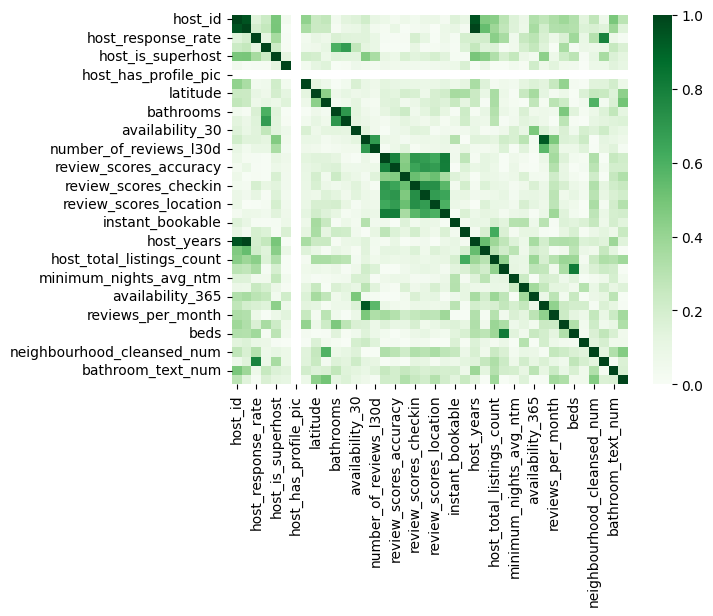

In [10]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(corrTabla2, cmap = 'Greens')
Heat_Map2

# Private Room

In [11]:
dfPrivate = df[df["room_type_num"] == 2]
dfPrivate

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
10,647454,2011,94.3,89.8,0.0,3,1,0,19.354160,-99.164880,...,0.0,1.13,991.0,1.0,10.0,2,2,3,4,3
13,1664327,2012,100.0,100.0,1.0,2,1,1,19.340340,-99.183450,...,66.0,0.51,366.0,1.0,50.0,2,2,3,3,3
14,816295,2011,100.0,80.0,1.0,2,1,1,19.396750,-99.175810,...,107.0,0.85,315.0,1.0,24.0,2,1,3,4,2
15,22366411,2014,94.3,89.8,0.0,2,1,0,19.405920,-99.169100,...,30.0,0.22,898.0,1.0,52.0,2,4,3,5,1
17,5870021,2013,100.0,100.0,0.0,5,1,1,19.354450,-99.162510,...,152.0,1.18,1200.0,1.0,29.0,2,2,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26510,41666883,2015,94.3,80.0,0.0,2,1,1,19.386376,-99.150102,...,0.0,1.13,365.0,1.0,5.0,2,1,3,3,2
26514,210503403,2018,94.3,100.0,0.0,1,1,1,19.400410,-99.155426,...,0.0,1.13,450.0,1.0,19.0,2,1,3,4,2
26515,108728752,2016,100.0,97.0,0.0,14,1,1,19.497344,-99.126527,...,0.0,1.13,509.0,1.0,7.0,2,5,3,3,1
26519,524946474,2023,83.0,63.0,0.0,3,1,1,19.430330,-99.168691,...,0.0,1.13,1939.0,2.0,19.0,2,4,2,4,1


In [12]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfPrivate = dfPrivate.drop("room_type_num", axis = 1)
corrTabla3 = abs(dfPrivate.corr())
corrTabla3

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
host_id,1.000000,0.976086,0.029279,0.079058,0.074814,0.039456,0.234469,0.009458,0.083413,0.128403,...,0.114220,0.150195,0.096353,0.048358,0.004754,0.098637,0.030987,0.009326,0.162057,0.077899
host_since,0.976086,1.000000,0.026542,0.081337,0.068990,0.046413,0.220685,0.004393,0.079882,0.132567,...,0.112803,0.143080,0.101080,0.039408,0.002476,0.098198,0.025143,0.013948,0.147405,0.071391
host_response_rate,0.029279,0.026542,1.000000,0.451821,0.210259,0.067398,0.060998,0.030829,0.034777,0.025387,...,0.080421,0.152532,0.138909,0.013737,0.033277,0.147448,0.024432,0.821502,0.052355,0.024064
host_acceptance_rate,0.079058,0.081337,0.451821,1.000000,0.258401,0.060081,0.044021,0.046411,0.057124,0.007007,...,0.061508,0.217821,0.211326,0.015214,0.014903,0.163830,0.014494,0.482838,0.000608,0.049736
host_is_superhost,0.074814,0.068990,0.210259,0.258401,1.000000,0.118358,0.064877,0.162985,0.023183,0.006344,...,0.059198,0.265068,0.219217,0.089511,0.005233,0.267814,0.036485,0.187125,0.024593,0.021274
host_listings_count,0.039456,0.046413,0.067398,0.060081,0.118358,1.000000,0.043188,0.088544,0.151716,0.016228,...,0.120800,0.007404,0.060388,0.055318,0.065467,0.038575,0.016480,0.069706,0.009169,0.117208
host_has_profile_pic,0.234469,0.220685,0.060998,0.044021,0.064877,0.043188,1.000000,0.014114,0.012911,0.041456,...,0.012389,0.081390,0.012338,0.006196,0.003355,0.097679,0.007689,0.059418,0.099194,0.000231
host_identity_verified,0.009458,0.004393,0.030829,0.046411,0.162985,0.088544,0.014114,1.000000,0.082057,0.028665,...,0.418181,0.126289,0.081275,0.068220,0.040930,0.207884,0.010856,0.100375,0.023472,0.078810
latitude,0.083413,0.079882,0.034777,0.057124,0.023183,0.151716,0.012911,0.082057,1.000000,0.091386,...,0.032466,0.096895,0.139320,0.013351,0.023301,0.024481,0.173666,0.053542,0.000648,0.671651
longitude,0.128403,0.132567,0.025387,0.007007,0.006344,0.016228,0.041456,0.028665,0.091386,1.000000,...,0.046287,0.012546,0.060839,0.075850,0.011034,0.037886,0.113667,0.032987,0.011577,0.310061


<Axes: >

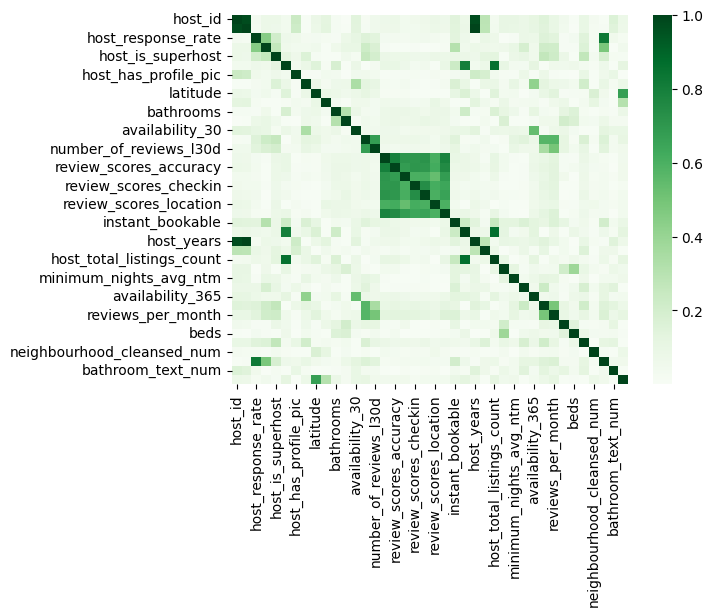

In [13]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map3 = sns.heatmap(corrTabla3, cmap = 'Greens')
Heat_Map3

# Shared Room

In [14]:
dfShared = df[df["room_type_num"] == 3]
dfShared

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,room_type_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
104,3059169,2012,94.3,89.8,0.0,1,1,0,19.446140,-99.158680,...,0.0,1.13,991.0,1.0,5.0,3,4,3,5,1
255,16186468,2014,94.3,60.0,0.0,3,1,1,19.407643,-99.173932,...,0.0,1.13,640.0,2.0,9.0,3,4,3,5,1
353,27291692,2015,94.3,100.0,0.0,1,1,1,19.329440,-99.160910,...,10.0,0.10,275.0,3.0,61.0,3,2,3,5,3
376,28190065,2015,100.0,92.0,1.0,2,1,1,19.438830,-99.152830,...,31.0,0.28,275.0,2.0,20.0,3,4,1,5,1
452,31426842,2015,100.0,96.0,1.0,2,1,1,19.443290,-99.109470,...,85.0,0.77,550.0,2.0,16.0,3,13,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26227,438265201,2021,90.0,94.0,0.0,15,1,1,19.406896,-99.175719,...,0.0,1.13,188.0,6.0,4.0,3,4,3,5,1
26294,541899248,2023,100.0,80.0,0.0,1,1,1,19.397400,-99.100020,...,1.0,1.00,311.0,1.0,7.0,3,6,3,5,0
26351,101241711,2016,100.0,100.0,0.0,3,1,1,19.393006,-99.153420,...,0.0,1.13,210.0,6.0,23.0,3,1,3,5,2
26405,92679034,2016,98.0,100.0,1.0,6,1,1,19.422517,-99.173349,...,1.0,1.00,320.0,1.0,4.0,3,4,3,5,1


In [15]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfShared = dfShared.drop("room_type_num", axis = 1)
corrTabla4 = abs(dfShared.corr())
corrTabla4

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,availability_365,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,neighbourhood_Category_num
host_id,1.000000,0.990059,0.175643,0.071985,0.292092,0.223587,0.161637,0.055048,0.156468,0.072759,...,0.055328,0.010848,0.143934,0.071242,0.013550,0.208886,0.015358,0.133471,NaN,0.191192
host_since,0.990059,1.000000,0.174401,0.047833,0.289875,0.193774,0.161124,0.064244,0.159833,0.076824,...,0.060132,0.005622,0.137597,0.074722,0.022881,0.191432,0.014145,0.139272,NaN,0.184616
host_response_rate,0.175643,0.174401,1.000000,0.379635,0.223600,0.074423,0.229379,0.049350,0.055984,0.041233,...,0.042472,0.152655,0.097886,0.008554,0.052777,0.316253,0.103807,0.896763,NaN,0.072906
host_acceptance_rate,0.071985,0.047833,0.379635,1.000000,0.344089,0.486328,0.189985,0.029799,0.225110,0.111533,...,0.112326,0.214649,0.200372,0.025710,0.165811,0.112749,0.080232,0.545152,NaN,0.075784
host_is_superhost,0.292092,0.289875,0.223600,0.344089,1.000000,0.116674,0.074645,0.147459,0.041880,0.104863,...,0.124961,0.094844,0.178356,0.148551,0.029266,0.244560,0.073091,0.272168,NaN,0.024961
host_listings_count,0.223587,0.193774,0.074423,0.486328,0.116674,1.000000,0.092444,0.181031,0.418319,0.006374,...,0.172742,0.164812,0.144804,0.190179,0.118110,0.285337,0.173461,0.131959,NaN,0.162454
host_has_profile_pic,0.161637,0.161124,0.229379,0.189985,0.074645,0.092444,1.000000,0.042232,0.001894,0.097009,...,0.006609,0.058586,0.017656,0.006328,0.033694,0.139620,0.081296,0.172907,NaN,0.008285
host_identity_verified,0.055048,0.064244,0.049350,0.029799,0.147459,0.181031,0.042232,1.000000,0.246770,0.006270,...,0.581124,0.113323,0.011833,0.119733,0.097382,0.164314,0.204474,0.106453,NaN,0.176796
latitude,0.156468,0.159833,0.055984,0.225110,0.041880,0.418319,0.001894,0.246770,1.000000,0.080166,...,0.123222,0.053244,0.002623,0.096330,0.180928,0.072850,0.109783,0.078930,NaN,0.626617
longitude,0.072759,0.076824,0.041233,0.111533,0.104863,0.006374,0.097009,0.006270,0.080166,1.000000,...,0.009937,0.049330,0.030331,0.067209,0.063773,0.039650,0.028784,0.079363,NaN,0.392847


<Axes: >

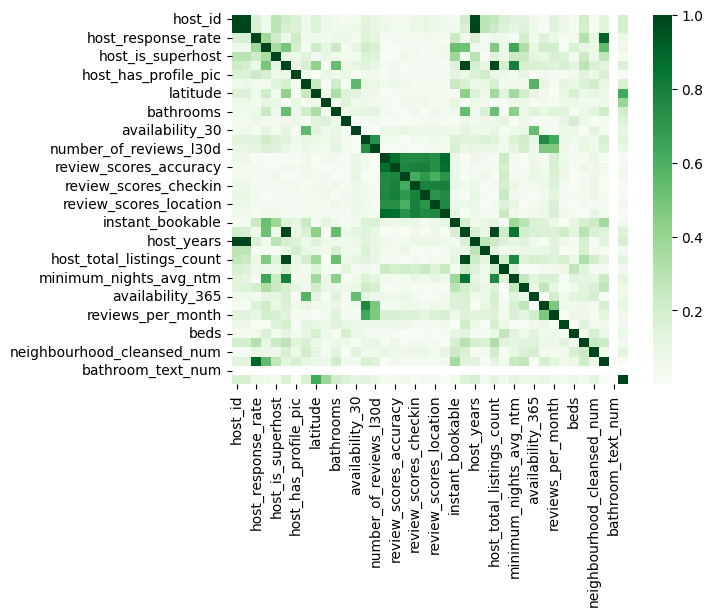

In [16]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map4 = sns.heatmap(corrTabla4, cmap = 'Greens')
Heat_Map4